# Unsmoothing Method - AR

This notebook would use Li2CO3 data from investing.com (which totally have data from 2018 to 2023) and the unit is CNY/TON. 

In [8]:
import warnings 
warnings.filterwarnings('ignore')
from utils.utils import transform_data, plot_correlogram, get_stock_data
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
import statsmodels.tsa.arima.model as tsa

In [2]:
li2co3 = transform_data("../data/Lithium Carbonate 99%Min China Spot Historical Data2.csv")

         Date       Price        Open        High         Low  Vol. Change %
0  11/10/2023  144,500.00  144,500.00  147,000.00  142,000.00   NaN   -2.03%
1  11/09/2023  147,500.00  147,500.00  150,000.00  145,000.00   NaN    0.00%
2  11/08/2023  147,500.00  147,500.00  150,000.00  145,000.00   NaN   -1.34%
3  11/07/2023  149,500.00  149,500.00  152,000.00  147,000.00   NaN   -2.61%
4  11/06/2023  153,500.00  153,500.00  156,000.00  151,000.00   NaN   -0.65%


Please enter the column names, separated by a comma:  Date, Price, 1,2,3,4,5


<AxesSubplot: xlabel='Date'>

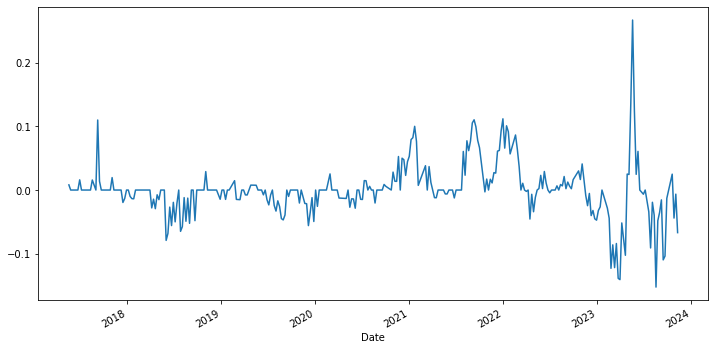

In [3]:
# Specify the size of the figure
plt.figure(figsize=(12, 6))
li2co3.Log_Return.plot()

In [4]:
# ro is observed data
ro = li2co3.Log_Return

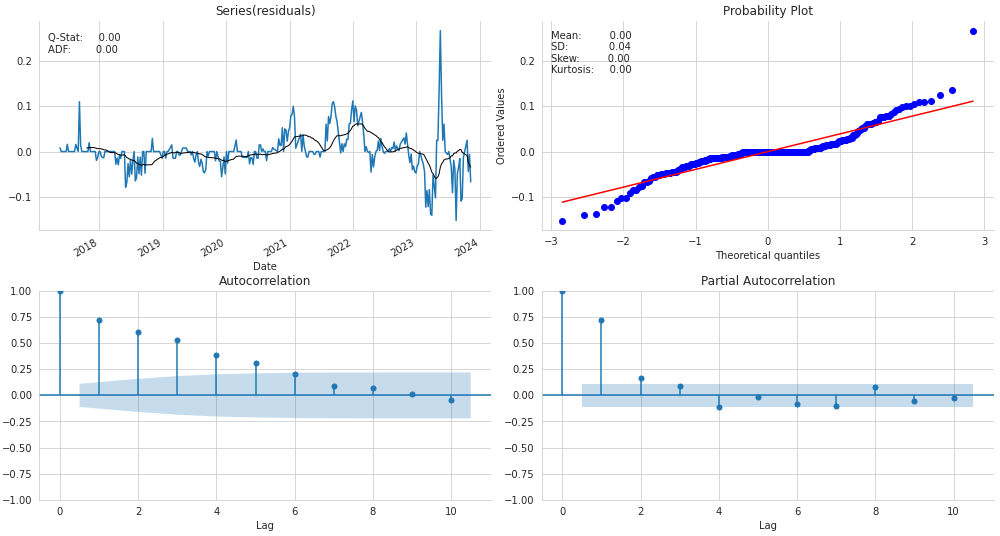

In [5]:
plot_correlogram(ro)

## Unsmoothing with Autoregressive Model: AR(1)

Given $$r_t = \mu + e_t$$

$$r_t^o = (1-\theta_1 - \theta_2 - ...) r_t + \theta_1 r_{t-1}^o + \theta_2 r_{t-2}^o  + ...$$
where $r^o$ is observed data

We have $$ r_t = \mu + \theta (r_{t-1}^o - \mu) + (1-\theta) e_t$$

Run regression on $$ \hat{r}_t^o = a + b\hat{r}_{t-1}^o + \epsilon_t$$
Then $$ \hat{\theta} = \hat{b},\ \hat{\mu} = \frac{\hat{a}}{1-\hat{b}}, \ \hat{e}_t = \frac{\hat{\epsilon}_t}{1-\hat{b}} $$
Thus $$ \hat{r}_t = \hat{\mu} + \hat{e}_t $$

## AR(p = 1) 

In [9]:
# ro_stationary 

AR_1_result = tsa.ARIMA(ro,order=(1,0,0)).fit()
a, b, std = AR_1_result.params
theta = b 
mu = a/(1-b)
et = AR_1_result.resid/(1-b)
fitted = mu + et

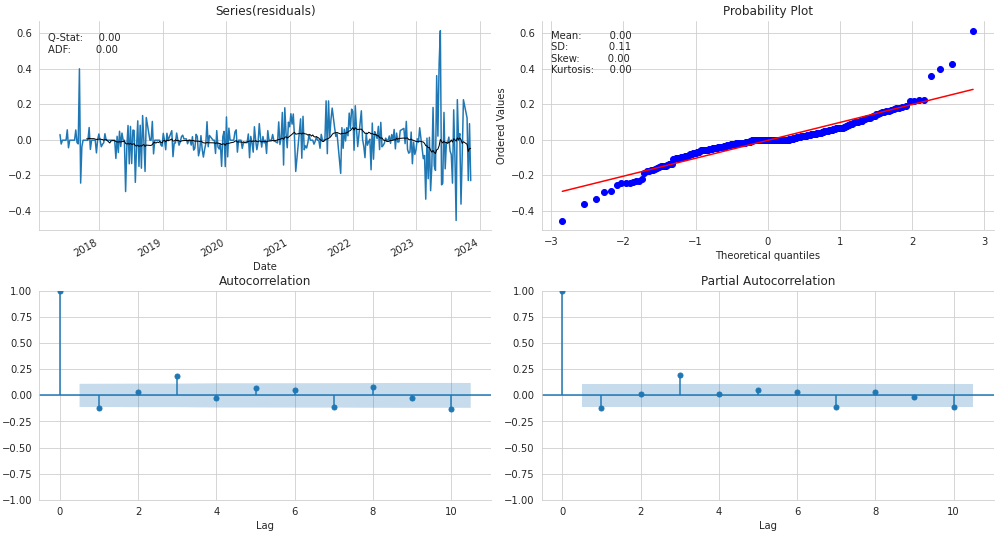

In [10]:
plot_correlogram(fitted)

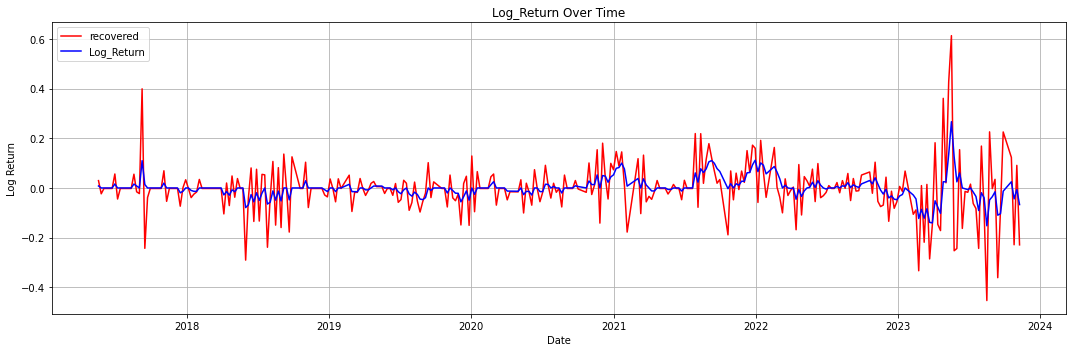

In [11]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## AR(p = 2) 

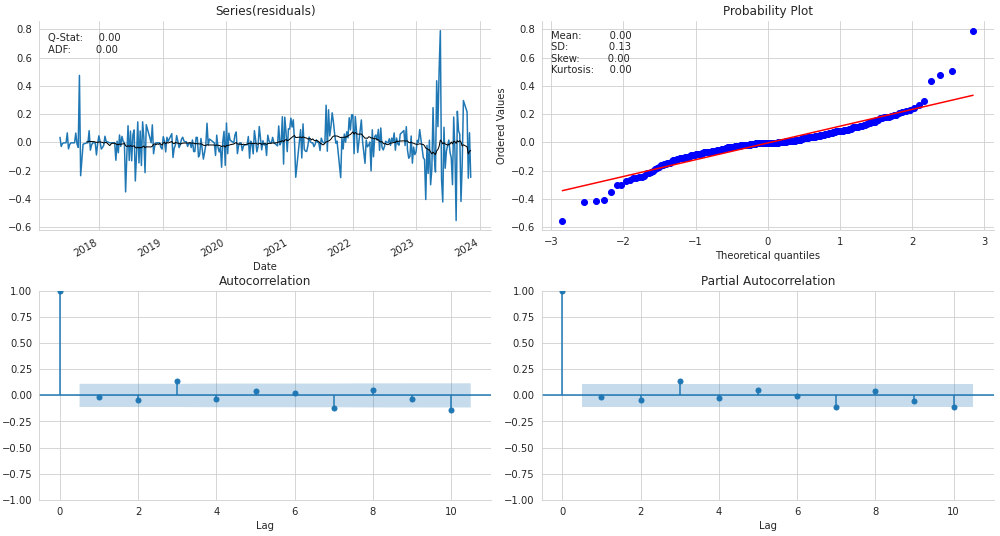

In [12]:
# ro_stationary 

AR_2_result = tsa.ARIMA(ro,order=(2,0,0)).fit()
a, b1, b2, std = AR_2_result.params
theta = b 
mu = a/(1-b1-b2)
et = AR_2_result.resid/(1-b1-b2)
fitted_2 = mu + et
plot_correlogram(fitted_2)

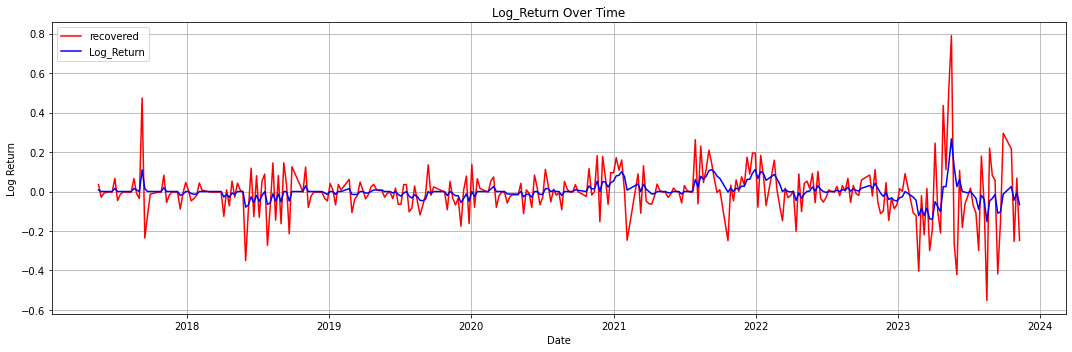

In [13]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_2, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## AR(p=3)

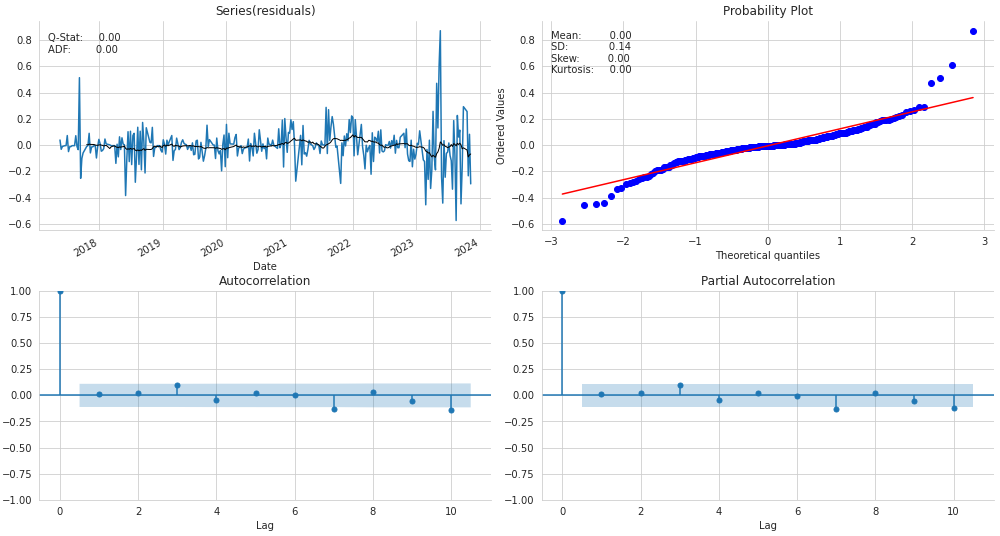

In [14]:
# ro_stationary 

AR_3_result = tsa.ARIMA(ro,order=(3,0,0)).fit()
a, b1, b2, b3, std = AR_3_result.params
mu = a/(1-b1-b2-b3)
et = AR_3_result.resid/(1-b1-b2-b3)
fitted_3 = mu + et
plot_correlogram(fitted_3)

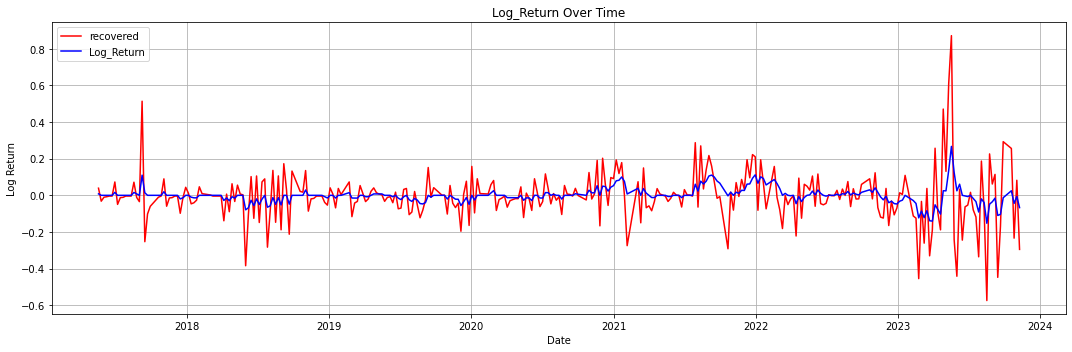

In [15]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_3, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()